In [20]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sns
%matplotlib inline
import yfinance as yf 
yf.pdr_override() 

In [7]:
#stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

stock =['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
start = pd.to_datetime('2013-12-12') 
end = pd.to_datetime('2018-03-29')
data = pdr.get_data_yahoo(stock, start=start, end=end)['Adj Close']
complete_data = pdr.get_data_yahoo(stock, start=start, end=end)
daily_returns = (data/data.shift(1))-1
returns = np.log(data/data.shift(1))

[*********************100%***********************]  6 of 6 downloaded
[*********************100%***********************]  6 of 6 downloaded


In [8]:
data.head()

,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-12-12,72.55,381.25,39.79,21.06,147.47,68.21
2013-12-13,71.76,384.24,39.82,21.30,147.65,67.85
2013-12-16,72.16,388.97,40.49,21.41,147.94,67.55
2013-12-17,71.83,387.65,39.96,21.45,152.46,67.13
2013-12-18,71.29,395.96,40.40,21.75,147.98,67.73


In [9]:
complete_data.head()

Adj Close                                       Close          \
                AAPL    AMZN     DB     GE    TSLA    WMT   AAPL    AMZN   
Date                                                                       
2013-12-12     72.55  381.25  39.79  21.06  147.47  68.21  80.08  381.25   
2013-12-13     71.76  384.24  39.82  21.30  147.65  67.85  79.20  384.24   
2013-12-16     72.16  388.97  40.49  21.41  147.94  67.55  79.64  388.97   
2013-12-17     71.83  387.65  39.96  21.45  152.46  67.13  79.28  387.65   
2013-12-18     71.29  395.96  40.40  21.75  147.98  67.73  78.68  395.96   

                          ...   Open                           Volume  \
               DB     GE  ...     DB     GE    TSLA    WMT       AAPL   
Date                      ...                                           
2013-12-12  43.41  25.52  ...  43.55  25.48  139.70  79.11   65572500   
2013-12-13  43.44  25.81  ...  43.66  25.57  148.05  78.73   83205500   
2013-12-16  44.17  25.94  ...  44.39  25.90  148.48  78.25   70648200   
2013-12-17  43.59  25.99  ...  43.72  26.06  147.58  77.74   57475600   
2013-12-18  44.07  26.36  ...  43.58  25.99  152.24  77.28  141465800   

                                                            
               AMZN       DB        GE      TSLA       WMT  
Date                                                        
2013-12-12  2123700   665500  32198600  10767800   5691600  
2013-12-13  3025000   347800  41427000  10591900   4981200  
2013-12-16  2251700   633500  41766400   6675300   6146900  
2013-12-17  2343900   382700  38097900  10495000   5765400  
2013-12-18  3489100  1113700  57479600  11581900  10633700  

[5 rows x 36 columns]

In [10]:
returns.head()

,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-13,-0.010949,0.007812,0.000754,0.011332,0.001220,-0.005292
2013-12-16,0.005559,0.012235,0.016686,0.005151,0.001962,-0.004431
2013-12-17,-0.004584,-0.003399,-0.013176,0.001867,0.030095,-0.006237
2013-12-18,-0.007546,0.021210,0.010951,0.013889,-0.029825,0.008898


In [11]:
data.to_csv('DATA.cvs')

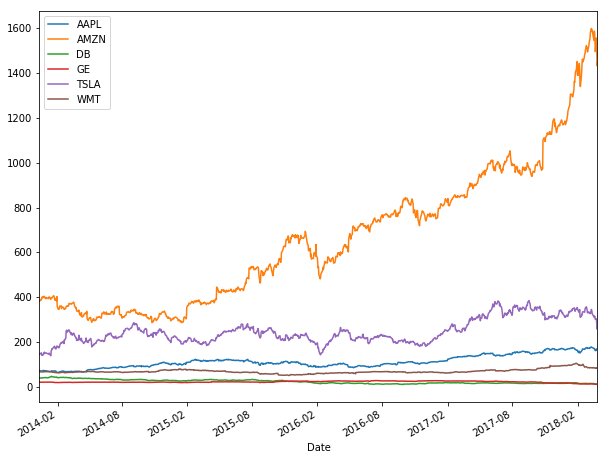

In [23]:
#plt.figure(figsize=(20,8))
data.plot(figsize=(10,8))
plt.show()

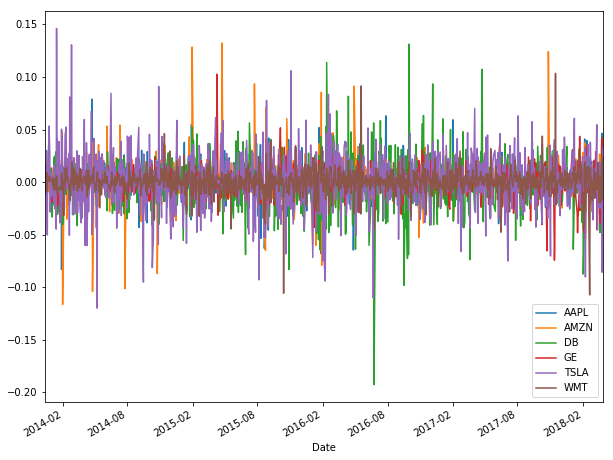

In [25]:
#plt.figure(figsize=(20,8))
returns.plot(figsize=(10,8))
plt.show()

In [43]:
# This is the yearly mean (one has to multiply by 252 trading days)

print(returns.mean()*252)
print('\n')
print(returns.cov()*252)

AAPL    0.191199
AMZN    0.311273
DB     -0.250494
GE     -0.118198
TSLA    0.137751
WMT     0.055429
dtype: float64


          AAPL      AMZN        DB        GE      TSLA       WMT
AAPL  0.052089  0.023719  0.022079  0.012885  0.025443  0.010004
AMZN  0.023719  0.086422  0.024108  0.013257  0.042274  0.008383
DB    0.022079  0.024108  0.132313  0.024870  0.028939  0.012039
GE    0.012885  0.013257  0.024870  0.040531  0.017999  0.008832
TSLA  0.025443  0.042274  0.028939  0.017999  0.166316  0.011894
WMT   0.010004  0.008383  0.012039  0.008832  0.011894  0.035870


In [30]:
returns.corr()

,AAPL,AMZN,DB,GE,TSLA,WMT
AAPL,1.000000,0.353520,0.265950,0.280423,0.273360,0.231436
AMZN,0.353520,1.000000,0.225446,0.223997,0.352607,0.150566
DB,0.265950,0.225446,1.000000,0.339607,0.195081,0.174758
GE,0.280423,0.223997,0.339607,1.000000,0.219228,0.231641
TSLA,0.273360,0.352607,0.195081,0.219228,1.000000,0.153987
WMT,0.231436,0.150566,0.174758,0.231641,0.153987,1.000000


In [36]:
# We start building the portfolio. We begin definind the weights.

In [67]:
def initialize_weights():
    weights = np.random.random(6)
    weights /= np.sum(weights)
    return weights;

In [68]:
def  calculate_portfolio_returns(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print('Expected Portfolio Return:',  portfolio_return)

In [69]:
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    print('Expected Variance:', portfolio_variance)

In [72]:
initialize_weights()

array([0.18425271, 0.08695878, 0.02885682, 0.25104723, 0.09965612,
       0.34922835])

In [77]:
calculate_portfolio_returns(returns,initialize_weights())

Expected Portfolio Return: 0.10433635095380629


In [87]:
calculate_portfolio_variance(returns,initialize_weights())

Expected Variance: 0.17974590606083557


In [64]:
# Enter Monte Carlo

In [88]:
def generate_portfolios(weights, returns):
    
    preturns = []
    pvariances = []
    
    # Monte Carlo simulation: We generate several randon weights and their correspondig portfolios
    
    for i in range(10000):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
        
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances
    

In [89]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances, returns, c = returns/variances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.show()

In [90]:
portdata = generate_portfolios(initialize_weights(), returns)
portdata

(array([0.10598704, 0.010057  , 0.10855798, ..., 0.07995478, 0.08076098,
        0.05893393]),
 array([0.18310592, 0.16213318, 0.15732387, ..., 0.17425289, 0.17031572,
        0.18969657]))

In [91]:
portdata[0]

array([0.10598704, 0.010057  , 0.10855798, ..., 0.07995478, 0.08076098,
       0.05893393])

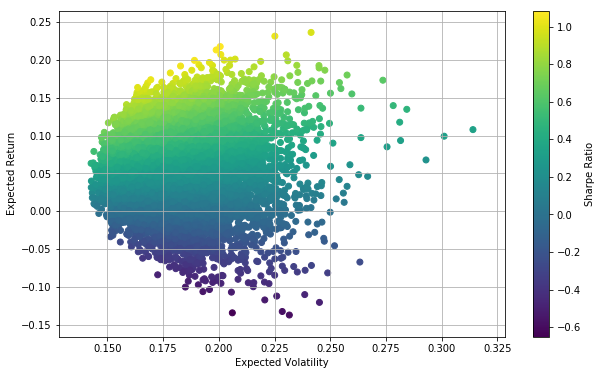

In [92]:
plot_portfolios(portdata[0], portdata[1])

# =================================================

In [96]:
# We now find the optimal porfolio

In [97]:
import scipy.optimize as optimization

In [142]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

In [141]:
# We want to maximize the Sharpe ratio:

def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [143]:
# Here we include the constrains on the weights. The sum of weights is equal to 1.
# f(x) = 0 is the function to minimize.
# Any weight seed will lead us to the optimum portfolio allocation.


def optimize_portfolio(weights, returns):
    constraints = ({'type': 'eq','fun': lambda x: np.sum(x)-1} ) # The sum of weights is 1
    bounds = tuple((0,1) for x in range(6)) # Individual weights can at most be 1: I invest everything in 1 stock
    optimum = optimization.minimize(fun = min_func_sharpe, x0 = weights, args = returns, method = 'SLSQP', bounds = bounds, constraints=constraints)
    return optimum

In [161]:
print(optimize_portfolio(initialize_weights(),returns)['x'].round(3))

[0.419 0.541 0.    0.    0.    0.04 ]


In [155]:
optimize_portfolio(initialize_weights(),returns)['x'].sum()

1.0000000000000004

In [186]:
print(statistics(optimize_portfolio(initialize_weights(),returns)['x'], returns).round(3))

[0.251 0.214 1.17 ]


# ===================================

In [162]:
# Optimal portfolio according to weights. 
def print_optimal_portfolio(optimum, returns):
    print('Optimal Weights: ', optimum['x'].round(3))
    print('Expected return, volatility and Sharpe Ratio: ', statistics(optimum['x'], returns).round(3))

In [209]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], markersize = 2.0)
    plt.scatter(pvariances, preturns, c = preturns/pvariances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.scatter(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], c = 'r' )
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], color = 'r',markersize = 200.0)
    plt.show()

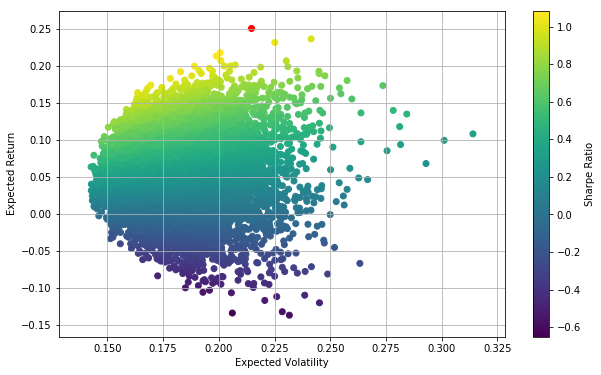

In [210]:
show_optimal_portfolio(optimum, returns, portdata[0], portdata[1])

In [163]:
 print_optimal_portfolio(optimum, returns)

Optimal Weights:  [0.419 0.541 0.    0.    0.    0.04 ]
Expected return, volatility and Sharpe Ratio:  [0.251 0.214 1.17 ]


# =====================================